In [14]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [4]:
fashion=tf.keras.datasets.fashion_mnist

In [5]:
(x_trainfull,y_trainfull),(x_test,y_test)=fashion.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
x_trainfull

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
x_trainfull.shape

(60000, 28, 28)

In [11]:
x_valid,x_train=x_trainfull[:5000]/255.0,x_trainfull[:5000]/255.0
y_valid,y_train=y_trainfull[:5000],y_trainfull[:5000]

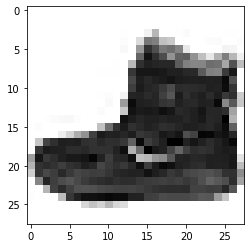

In [13]:
plt.imshow(x_train[0],cmap='binary')
plt.show()

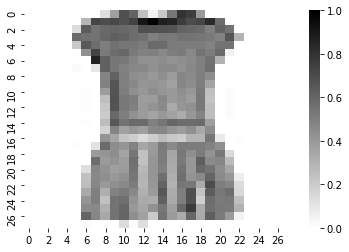

In [20]:
# plt.figure(figsize=(10,10))
sns.heatmap(x_train[3],cmap='binary')
plt.show()

In [22]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(320,activation='relu'),
    tf.keras.layers.Dense(120,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
]
model=tf.keras.models.Sequential(LAYERS)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 320)               251200    
_________________________________________________________________
dense_1 (Dense)              (None, 120)               38520     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1210      
Total params: 290,930
Trainable params: 290,930
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(
loss=tf.losses.sparse_categorical_crossentropy,
optimizers=tf.keras.optimizers.SGD(0.002),
metrics=['accuracy']
)

In [25]:
model.fit(x_train,y_train,epochs=13,validation_data=(x_valid,y_valid))

Train on 5000 samples, validate on 5000 samples
Epoch 1/13
5000/5000 [==============================] - 2s 385us/sample - loss: 0.8125 - accuracy: 0.7086 - val_loss: 0.8180 - val_accuracy: 0.7250
Epoch 2/13
5000/5000 [==============================] - 1s 121us/sample - loss: 0.5390 - accuracy: 0.8008 - val_loss: 0.5076 - val_accuracy: 0.8078
Epoch 3/13
5000/5000 [==============================] - 1s 119us/sample - loss: 0.4628 - accuracy: 0.8266 - val_loss: 0.4247 - val_accuracy: 0.8280
Epoch 4/13
5000/5000 [==============================] - 1s 120us/sample - loss: 0.4091 - accuracy: 0.8510 - val_loss: 0.4137 - val_accuracy: 0.8468
Epoch 5/13
5000/5000 [==============================] - 1s 119us/sample - loss: 0.3756 - accuracy: 0.8586 - val_loss: 0.5434 - val_accuracy: 0.8126
Epoch 6/13
5000/5000 [==============================] - 1s 121us/sample - loss: 0.3511 - accuracy: 0.8672 - val_loss: 0.2766 - val_accuracy: 0.8942
Epoch 7/13
5000/5000 [==============================] - 1s 123us

In [34]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[143.8036242248535, 0.8362]

0
0
0
0
0
0
0
0
0
0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


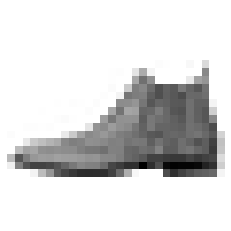

0
0
0
0
0
0
0
0
0
0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


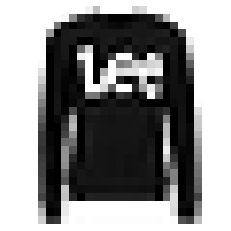

0
0
0
0
0
0
0
0
0
0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


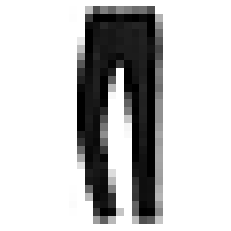

0
0
0
0
0
0
0
0
0
0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


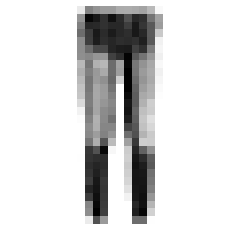

0
0
0
0
0
0
0
0
0
0
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


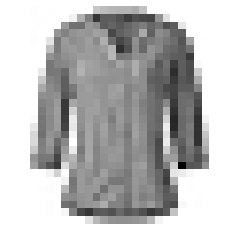

0
0
0
0
0
0
0
0
0
0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


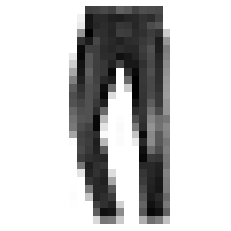

0
0
0
0
0
0
0
0
0
0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


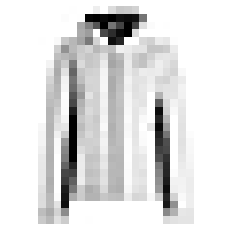

0
0
0
0
0
0
0
0
0
0
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


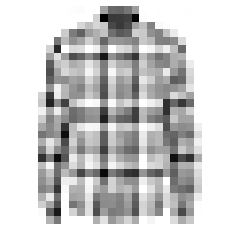

0
0
0
0
0
0
0
0
0
0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


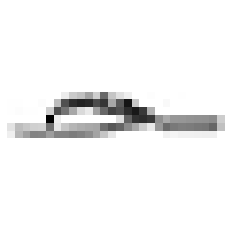

0
0
0
0
0
0
0
0
0
0
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


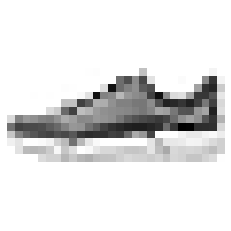

In [75]:
import numpy as np
for data,pred,actual in zip(x_test[:10],((model.predict(x_test[:10]))),y_test[:10]):
    plt.imshow(data,cmap='binary')
    plt.axis('off')
    for i in pred:
        print(np.argmax(i))
#     plt.title(np.argmax(pred),actual)
    
            
            
    print(pred)
    plt.show()

In [47]:
values={
'0':'T-shirt/top',
'1':'Trouser',
'2':'Pullover',
'3':'Dress',
'4':'Coat',
'5':'Sandal',
'6':'Shirt',
'7':'Sneaker',
'8':'Bag',
'9':'Ankle boot'}

In [77]:
for i,j in zip(y_test[:10],model.predict(x_test[:10])):
    print('predicted',np.argmax(j))
    print('actual',i)

predicted 9
actual 9
predicted 2
actual 2
predicted 1
actual 1
predicted 1
actual 1
predicted 6
actual 6
predicted 1
actual 1
predicted 4
actual 4
predicted 6
actual 6
predicted 5
actual 5
predicted 7
actual 7


In [78]:
!git init

Initialized empty Git repository in C:/Users/ideapad GAMIN/DL/.git/
